In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from nltk import classify

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/moviesss/Movies_and_TV_5.json
/kaggle/input/amazon-fashion/AMAZON_FASHION_5.json
/kaggle/input/movielink/reviews_Movies_and_TV.json
/kaggle/input/pet-supplies/Pet_Supplies_5.json
/kaggle/input/andriod5/Apps_for_Android_5.json
/kaggle/input/cellphones/Cell_Phones_and_Accessories_5.json
/kaggle/input/workas/index.html
/kaggle/input/orgmovie/meta_Movies_and_TV.json
/kaggle/input/orgmovie1/Movies_and_TV.json


In [ ]:
testa = pd.read_csv('https://download.data.world/s/gd4xczpdmoeefoyty32wqh7dqrtold')

In [ ]:
testa.columns

In [ ]:
!wget gs://vms-bda-2/2008.csv

In [ ]:
!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Movies_and_TV.json.gz

In [ ]:
import gzip

with gzip.open('review_Movies_and_TV.json.gz') as f:

    features_train = pd.read_json(f)

features_train.head()

In [2]:
import pandas as pd



# df = pd.read_json("/kaggle/input/andriod5/Apps_for_Android_5.json",lines=True).dropna()
# df1 = pd.read_json("/kaggle/input/amazon-fashion/AMAZON_FASHION_5.json",lines=True).dropna()
# df2 = pd.read_json("/kaggle/input/cellphones/Cell_Phones_and_Accessories_5.json",lines=True).dropna()
# df3 = pd.read_json("/kaggle/input/pet-supplies/Pet_Supplies_5.json",lines=True).dropna()

df4 = pd.read_json("/kaggle/input/moviesss/Movies_and_TV_5.json",lines=True).dropna()

In [ ]:
df4

In [3]:

df5 = pd.read_json("/kaggle/input/orgmovie/meta_Movies_and_TV.json",lines=True)


In [ ]:
df5.head(10)

In [ ]:
df6 = df5[['asin','brand']]

In [4]:
# listing= [df4df5]
# concating = pd.concat(listing,ignore_index=True,sort=True)
concating = pd.merge(df4,df5[['asin','brand']],on='asin')

In [5]:
concating = concating.dropna()

In [ ]:
concating.head(500)

In [6]:
confirm = concating[['brand','asin','overall','reviewerName','reviewText','summary']].head(80000)
# confirm = df[['overall','reviewerName','reviewText','summary']]
confirm.shape


(80000, 6)

In [7]:
confirm = confirm.replace(np.nan, 'no value', regex=True)

In [ ]:
confirm.head(7000)

In [ ]:
from textblob import TextBlob
TextBlob(sentence).sentiment

In [ ]:
unda = list(scora.values())

In [ ]:
type

In [ ]:
y

In [ ]:
confirm['reviewText'][118]

In [ ]:

# yorp = confirm[confirm['overall']==1 ]

# yorp['overall'].count()






        
        
    


        

                          
        

In [ ]:
confirm['reviewText'][1]


In [ ]:
len(confirm)

In [ ]:
# scal = confirm[confirm['overall'] != 3]
# X = confirm['reviewText']
# y_dict = {1:-1, 2:-1,3:0,4:1, 5:1}
# y = confirm['overall'].map(y_dict)

In [8]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
confirm['texting'] = ""
confirm['texting'] = confirm['reviewText'].str.lower().str.split()


In [9]:
confirm['texting']=confirm['texting'].apply(lambda x: [item for item in x if item not in stop])

In [ ]:
list

In [ ]:
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [ ]:
iluilu = confirm['texting'].tolist()

In [10]:
confirm['liststring'] = [' '.join(map(str, l)) for l in confirm['texting']]


In [11]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# sentence = "bad person good man"
sid = SentimentIntensityAnalyzer()
# scora = sid.polarity_scores(confirm['liststring'][0])





[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/opt/conda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [12]:
# print(scora)
untakshri= confirm.join(confirm['liststring'].apply(lambda x: sid.polarity_scores(x)).apply(pd.Series))

In [ ]:
untakshri.head(6000)

In [ ]:
untakshri = untakshri.drop(columns = ['neg','neu','pos'],axis=1)

In [ ]:
untakshri.head(10)

In [13]:
untakshri=untakshri.rename(columns={"compound": "sentimentscore"})

In [14]:
untakshri.head(20)


,brand,asin,overall,reviewerName,reviewText,summary,texting,liststring,neg,neu,pos,sentimentscore
109,Ben Kingsley,0005119367,4,A. Abela,"A truly wonderfully made film, mostly accurate...",Wonderful!!!,"[truly, wonderfully, made, film,, mostly, accu...","truly wonderfully made film, mostly accurate s...",0.000,0.469,0.531,0.9287
110,Ben Kingsley,0005119367,5,Aaron D. Koehler,Joseph is amazing story to read and watch. A ...,Joseph,"[joseph, amazing, story, read, watch., person,...",joseph amazing story read watch. person lord's...,0.000,0.711,0.289,0.7579
111,Ben Kingsley,0005119367,5,A. J. Trivette,This WONDERFUL film is a total treat on every ...,As real as it gets!,"[wonderful, film, total, treat, every, level!,...",wonderful film total treat every level! admit ...,0.058,0.711,0.231,0.9860
112,Ben Kingsley,0005119367,5,"Alejandra Vernon ""artist & illustrator""",Though this interpretation of Joseph's life ha...,a man of character and faith,"[though, interpretation, joseph's, life, subst...",though interpretation joseph's life substantia...,0.066,0.727,0.207,0.9776
113,Ben Kingsley,0005119367,5,Alex,I loved this story about Joseph. It's one of m...,True Faith,"[loved, story, joseph., one, favourite, storie...",loved story joseph. one favourite stories old ...,0.050,0.589,0.361,0.9474
114,Ben Kingsley,0005119367,5,Amazon Customer,gave it as a gift to my sister she love it. a...,great gift,"[gave, gift, sister, love, it., good, telling,...",gave gift sister love it. good telling life jo...,0.000,0.444,0.556,0.8750
115,Ben Kingsley,0005119367,5,Anony Mous,"Magnificent acting, writing, directing, set de...",Magnificent!,"[magnificent, acting,, writing,, directing,, s...","magnificent acting, writing, directing, set de...",0.047,0.607,0.346,0.9299
116,Ben Kingsley,0005119367,5,assurance,to see how they take a name from bible (JOSEPH...,i'm glad i order this dvd,"[see, take, name, bible, (joseph), turn, dvd, ...",see take name bible (joseph) turn dvd movie sh...,0.000,1.000,0.000,0.0000
117,Ben Kingsley,0005119367,5,"atobteam ""atobteam""","One of the best-done Bible movies ever, if not...","Great, and Biblically/theologically accurate!","[one, best-done, bible, movies, ever,, best., ...","one best-done bible movies ever, best. i'm pas...",0.000,0.625,0.375,0.9931
118,Ben Kingsley,0005119367,5,"a viewer ""a viewer""",When this film debuted in 1994 as a miniseries...,THE BEST BIBLICAL FILM ON JOSEPH!!!,"[film, debuted, 1994, miniseries, television,,...","film debuted 1994 miniseries television, time ...",0.168,0.580,0.252,0.8827


## the scores are basically compound score based on the text without  stop words for positive it should be more than 0.05 and neutral would be more than -0.05 but less than 0.05 and negative is less than -0.05

In [15]:
iot = untakshri['sentimentscore'].values.tolist()

In [16]:
type(iot)

list

In [17]:
iott3 = []
iott4 = []
for iott2 in range(len(iot)):
    if iot[iott2]>=0.05:
        iott3.append("Pos")
        iott4.append(1)
    elif iot[iott2]>-0.05 and iot[iott2]<0.05:
        iott3.append("Neu")
        iott4.append(0)
    elif iot[iott2]<=-0.05:
        iott3.append("Neg")
        iott4.append(-1)
        

    

In [ ]:
len(iott3)

In [18]:
untakshri['sentiscore'] = iott4

In [19]:
untakshri['sentiments'] = iott3

In [20]:
untakshri.head(1675)

,brand,asin,overall,reviewerName,reviewText,summary,texting,liststring,neg,neu,pos,sentimentscore,sentiscore,sentiments
109,Ben Kingsley,0005119367,4,A. Abela,"A truly wonderfully made film, mostly accurate...",Wonderful!!!,"[truly, wonderfully, made, film,, mostly, accu...","truly wonderfully made film, mostly accurate s...",0.000,0.469,0.531,0.9287,1,Pos
110,Ben Kingsley,0005119367,5,Aaron D. Koehler,Joseph is amazing story to read and watch. A ...,Joseph,"[joseph, amazing, story, read, watch., person,...",joseph amazing story read watch. person lord's...,0.000,0.711,0.289,0.7579,1,Pos
111,Ben Kingsley,0005119367,5,A. J. Trivette,This WONDERFUL film is a total treat on every ...,As real as it gets!,"[wonderful, film, total, treat, every, level!,...",wonderful film total treat every level! admit ...,0.058,0.711,0.231,0.9860,1,Pos
112,Ben Kingsley,0005119367,5,"Alejandra Vernon ""artist & illustrator""",Though this interpretation of Joseph's life ha...,a man of character and faith,"[though, interpretation, joseph's, life, subst...",though interpretation joseph's life substantia...,0.066,0.727,0.207,0.9776,1,Pos
113,Ben Kingsley,0005119367,5,Alex,I loved this story about Joseph. It's one of m...,True Faith,"[loved, story, joseph., one, favourite, storie...",loved story joseph. one favourite stories old ...,0.050,0.589,0.361,0.9474,1,Pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,Arnold Schwarzenegger,0767815335,4,MJV & The Movies,"In the 1993 adventure film, LAST ACTION HERO, ...",The bad guys are in there!,"[1993, adventure, film,, last, action, hero,, ...","1993 adventure film, last action hero, arnold ...",0.000,0.644,0.356,0.9963,1,Pos
1980,Arnold Schwarzenegger,0767815335,1,"M. Kupper ""hfiuwrhfi""",This has to be one of the worst movies ever ma...,You reviewers must be kidding...,"[one, worst, movies, ever, made., terrible, pl...","one worst movies ever made. terrible plot, co-...",0.275,0.725,0.000,-0.8020,-1,Neg
1981,Arnold Schwarzenegger,0767815335,5,Mr. P. Power,This Movie Was (as one critic put it) Passed ...,Great Movie Passed over by Public by with good...,"[movie, (as, one, critic, put, it), passed, cr...",movie (as one critic put it) passed crowd went...,0.119,0.629,0.252,0.9466,1,Pos
1982,Arnold Schwarzenegger,0767815335,4,Muzzlehatch,Like a large percentage of Arnold Schwarzenegg...,Self-reflexive Arnold film isn't as good as it...,"[like, large, percentage, arnold, schwarzenegg...",like large percentage arnold schwarzenegger's ...,0.108,0.701,0.190,0.9929,1,Pos


In [21]:
untakshri  = untakshri.drop(columns = ['texting'],axis=1)

In [22]:
untakshri

,brand,asin,overall,reviewerName,reviewText,summary,liststring,neg,neu,pos,sentimentscore,sentiscore,sentiments
109,Ben Kingsley,0005119367,4,A. Abela,"A truly wonderfully made film, mostly accurate...",Wonderful!!!,"truly wonderfully made film, mostly accurate s...",0.000,0.469,0.531,0.9287,1,Pos
110,Ben Kingsley,0005119367,5,Aaron D. Koehler,Joseph is amazing story to read and watch. A ...,Joseph,joseph amazing story read watch. person lord's...,0.000,0.711,0.289,0.7579,1,Pos
111,Ben Kingsley,0005119367,5,A. J. Trivette,This WONDERFUL film is a total treat on every ...,As real as it gets!,wonderful film total treat every level! admit ...,0.058,0.711,0.231,0.9860,1,Pos
112,Ben Kingsley,0005119367,5,"Alejandra Vernon ""artist & illustrator""",Though this interpretation of Joseph's life ha...,a man of character and faith,though interpretation joseph's life substantia...,0.066,0.727,0.207,0.9776,1,Pos
113,Ben Kingsley,0005119367,5,Alex,I loved this story about Joseph. It's one of m...,True Faith,loved story joseph. one favourite stories old ...,0.050,0.589,0.361,0.9474,1,Pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82604,Ann Blyth,6302593220,1,A. J. De Koning,"What a ridiculous price, I suppose nobody will...",No Subtitles,"ridiculous price, suppose nobody buying price....",0.075,0.781,0.145,0.5233,1,Pos
82605,Ann Blyth,6302593220,2,"Anton Beat Riess ""Toni Riess""",In few words: the film is superb: great art di...,"Film good, DVD-R not","words: film superb: great art direction, great...",0.088,0.565,0.347,0.9854,1,Pos
82606,Ann Blyth,6302593220,5,"Beverly J. Scott ""Author and avid reader""",&quot;The Student Prince&quot; has a captivati...,Glorious Music,&quot;the student prince&quot; captivating sto...,0.279,0.721,0.000,-0.7985,-1,Neg
82607,Ann Blyth,6302593220,5,CelticWomanFanPiano,Ahh! I absolutely LOVE this movie. The peopl...,Beautiful!,"ahh! absolutely love movie. people beautiful, ...",0.000,0.502,0.498,0.9888,1,Pos


In [ ]:
count = 0
# for jumpaiiy in range(len(untakshri)):
#     if(untakshri['asin'][jumpaiiy]=='0005019281'):
#         count = count+1

# for jumpaiiy in range(len(untakshri)):
#     if(untakshri['sentiments'][jumpaiiy]=='Neu'):
#         print([jumpaiiy])
        
        
#         count = count+1
        
# print(count)
# yui = untakshri[['asin','overall','sentimentscore']]

# dones = yui.groupby(['asin']).overall.count().to_frame("one")

        
print(count)
print(dones)
# untakshri['asin'][40000]

In [23]:
winner = untakshri

In [ ]:
# winner1 = winner.groupby(['asin','overall','sentimentscore']).size().to_frame("counts").reset_index()


In [ ]:
winner2 = winner.groupby(['asin']).mean().to_frame("ratings").reset_index()

In [ ]:
# # ikwa = []
# # for ikwa1 in range(len(winner2));
# ikwa=[]
# for ikwa1 in range(len(winner))
#     ikwa.append()



In [ ]:

winner3 = winner.groupby(['brand'])['sentimentscore'].mean().to_frame("trust").reset_index()

In [ ]:
winner4 = winner3['trust'].tolist()

In [ ]:
winner2 = winner2.rename(columns={"asin": "brandid"})


In [ ]:
winner2['Trust'] = winner4

In [ ]:
winner2.head(20)

In [24]:
winner5 = winner.groupby(['brand', 'overall'], as_index=False).mean().groupby('brand')['sentimentscore'].mean().to_frame("newwala").reset_index()

In [25]:
winner6 = winner.groupby(['brand', 'sentimentscore'], as_index=False).mean().groupby('brand')['overall'].mean().to_frame("newwala1").reset_index()

In [26]:
winner7 = winner5['newwala'].tolist()

In [27]:
winner6['sentis'] = winner7

In [28]:
winner6 = winner6.rename(columns = {"newwala1":"ratings","asin":"productid"})

In [29]:
winner6.head(670)

,brand,ratings,sentis
0,'Weird Al' Yankovic,4.485000,0.227092
1,Adrian Pasdar,3.772000,0.328057
2,Adrienne Barbeau,3.705882,0.248754
3,Aerosmith,4.444444,0.637857
4,Aileen Quinn,4.181895,0.671302
...,...,...,...
665,Matt Adler,4.882353,0.724628
666,Matt Mitler,3.428571,0.656421
667,Matt Raftery,2.461538,-0.106779
668,Matt Salinger,3.106383,0.631057


In [30]:
dilbar = []

for dilbar1 in range(len(winner6)):
    if(winner6['ratings'][dilbar1]>=4 and winner6['sentis'][dilbar1]>=0.05):
        dilbar.append(1)
    elif(winner6['ratings'][dilbar1]>=4 and winner6['sentis'][dilbar1]>-0.05 and winner6['sentis'][dilbar1]<0.05):
        dilbar.append(0)
    elif(winner6['ratings'][dilbar1]>=4 and winner6['sentis'][dilbar1]<=-0.05):
        dilbar.append(0)
        
    elif(winner6['ratings'][dilbar1]>=3 and winner6['ratings'][dilbar1]<4 and winner6['sentis'][dilbar1]>-0.05 and winner6['sentis'][dilbar1]<0.05):
        dilbar.append(1)
    elif(winner6['ratings'][dilbar1]>=3 and winner6['ratings'][dilbar1]<4 and winner6['sentis'][dilbar1]>=0.05):
        dilbar.append(0)
    elif(winner6['ratings'][dilbar1]>=3 and winner6['ratings'][dilbar1]<4  and  winner6['sentis'][dilbar1]<=-0.05):
        dilbar.append(0)
    elif(winner6['ratings'][dilbar1]>=1 and winner6['ratings'][dilbar1]<3  and  winner6['sentis'][dilbar1]<=-0.05):
        dilbar.append(1)
    elif(winner6['ratings'][dilbar1]>=1 and winner6['ratings'][dilbar1]<3  and  winner6['sentis'][dilbar1]>-0.05 and winner6['sentis'][dilbar1]<0.05):
        dilbar.append(0)
    elif(winner6['ratings'][dilbar1]>=1 and winner6['ratings'][dilbar1]<3  and  winner6['sentis'][dilbar1]>=0.05):
        dilbar.append(0)
    
    
        
   
        

In [31]:
winner6['trustcheck'] = dilbar

In [32]:
winner6

,brand,ratings,sentis,trustcheck
0,'Weird Al' Yankovic,4.485000,0.227092,1
1,Adrian Pasdar,3.772000,0.328057,0
2,Adrienne Barbeau,3.705882,0.248754,0
3,Aerosmith,4.444444,0.637857,1
4,Aileen Quinn,4.181895,0.671302,1
...,...,...,...,...
1060,Yun-Fat Chow,4.500000,0.484674,1
1061,Yves Montand,4.676829,0.409808,1
1062,Yvonne Fisher,1.970588,0.177118,0
1063,Zach Galligan,3.777778,-0.102269,0


## ratings and trust based of each brands and in total 1065 brands

In [33]:
winner6 = winner6.drop(columns = ["sentis"],axis=1)

In [34]:
relevants = winner6

In [35]:
relevants = relevants[relevants['trustcheck']==1]

In [36]:
relevants

,brand,ratings,trustcheck
0,'Weird Al' Yankovic,4.485000,1
3,Aerosmith,4.444444,1
4,Aileen Quinn,4.181895,1
6,Akira Terao,4.250000,1
7,Akira Yamauchi,2.800000,1
...,...,...,...
1057,Yasuo Yamada,4.554688,1
1059,Yul Brynner,4.586869,1
1060,Yun-Fat Chow,4.500000,1
1061,Yves Montand,4.676829,1


## ratings that are consistents

In [40]:
irrelavants = winner6

In [41]:
irrelevants = irrelavants[irrelavants['trustcheck']==0]

In [42]:
irrelevants

,brand,ratings,trustcheck
1,Adrian Pasdar,3.772000,0
2,Adrienne Barbeau,3.705882,0
5,Akira Kamiya,3.888889,0
10,Alain Delon,3.757576,0
15,Alan Ladd,3.888889,0
...,...,...,...
1050,Wings Hauser,4.263158,0
1055,Yan Birch,3.250000,0
1058,Yoshiko Tanaka,4.875000,0
1062,Yvonne Fisher,1.970588,0


## Rating incosistent where rating doesnot match the sentiment score in terms of positive and negative

In [43]:
relevant1 = relevants[['brand','ratings']]
irrevant = irrelevants[['brand','ratings']]

In [44]:
relevant1.head(10)

,brand,ratings
0,'Weird Al' Yankovic,4.485000
3,Aerosmith,4.444444
4,Aileen Quinn,4.181895
6,Akira Terao,4.250000
7,Akira Yamauchi,2.800000
8,Al Hedison,4.484848
9,Al Pacino,4.036324
11,Alan Alda,4.312500
12,Alan Arkin,4.309091
13,Alan Baker (II),2.800000


## top 10 consistent product with its rating

In [45]:
irrevant.head(10)

,brand,ratings
1,Adrian Pasdar,3.772000
2,Adrienne Barbeau,3.705882
5,Akira Kamiya,3.888889
10,Alain Delon,3.757576
15,Alan Ladd,3.888889
18,Albert Dekker,3.666667
22,Alec Guinness,3.750000
24,Alexis (XI),3.152439
27,Alicia Silverstone,3.750000
33,Andrew McCarthy,3.792683


## top 10 inconsistent product with its rating

In [ ]:
relevant1.shape[0]

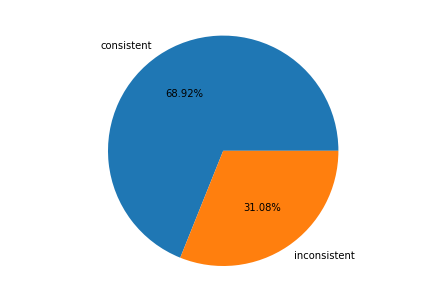

In [46]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ["consistent","inconsistent"]
students = [relevant1.shape[0],irrevant.shape[0]]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

## consistent-inconsistent ratings

# Below is the attempt i tried by training the model to use for predicting sentiment and categorize as positive negative and neutral but the accuracy is not that good that is why i used the pretrained ntlk sentimental analysis vader above


In [ ]:
winner9 = winner[['asin','sentimentscore']]

In [ ]:
winner10 = []

for wins in range(len(winner9)):
    if(winner9['sentimentscore'][wins]>=0.05):
        winner10.append(winner9['sentimentscore'][wins])

In [ ]:
winner10

In [ ]:
X = confirm['liststring']
y_dict = {1:-1, 2:-1,3:0,4:1, 5:1}
y = confirm['overall'].map(y_dict)

In [ ]:
confirm.head(24)

In [ ]:
df['reviewText'][23]

In [ ]:
rupp = X.tolist()
str1 = ' '.join([str(elem) for elem in rupp]) 
    

In [ ]:
X_toll = confirm['texting']

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score






c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    opio = ["I love you"]
    opio_c = model.fit_transform(opio)
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    
    clf = clf_model.fit(X_train, y_train)
    print()
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
#     print("Prediction from test",clf.predict(X_test))
#     predictions = clf.predict(X_test)
#     print("Validation accuracy:",accuracy_score(y_test, predictions))
#     custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
#     custom_tokens = word_tokenize(custom_tweet)

#     print(clf.predict(dict([token, True] for token in custom_tokens)))
    
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
#         print(len(coeff_df.to_string(index=False)))
        print('')
        print('-Top 20 negative-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print("-Top 20 Neutral")
        print(coeff_df[54440:54560].to_string(index=False))
        
        print('-Top 20 Positive-')        
        print(coeff_df.tail(20).to_string(index=False))
       
    
    
text_fit(X, y, c, LogisticRegression())

In [ ]:
text_fit(X, y, c, DummyClassifier(),0)

In [ ]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())


In [ ]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

In [ ]:
A=[]
for i in range(len(confirm['overall'])):
    if confirm['overall'][i]<=5 and confirm['overall'][i]>3 :
        A.append("Positive")
    elif confirm['overall'][i]<=3 and confirm['overall'][i]>2:
        A.append("Neutral")
    else:
        A.append("Negative")
        

In [ ]:
Ras = LogisticRegression()
Ras.predict("Hello")

In [ ]:
confirm['senti']=A

In [ ]:
confirm.head(120)

In [ ]:
confirm['reviewText'][118]

In [ ]:
# check = confirm[['reviewText','overall']]

In [ ]:
# df.columns

In [ ]:
# A = []
# for i in range(200):
#     A.append(check['helpful'][i][0])
    

In [ ]:
# B = []
# for j in range(200):
#     B.append(check['reviewText'][j])

In [ ]:
# C = list(zip(B,A))


In [ ]:
# C

In [ ]:
# # df[df['A'] > 2]['B'] = new_val  
# # def f(row):
# Jo = []
# for k in range(len(check['helpful'])):
#     if check['helpful'][k][0]==1:
#         Jo.append("Neutral")
        
#     elif check['helpful'][k][0]==0:
#         Jo.append("Negative")
#     else:
#         Jo.append("Positive")
        
        
        
# check['distancingsentiment']=Jo

        

      

            

    
        
   
        

In [ ]:
check.head()

In [ ]:
check.iloc[::100,:]

In [ ]:
check['checku']

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from nltk.tokenize import RegexpTokenizer
# #tokenizer to remove unwanted elements from out data like symbols and numbers
# token = RegexpTokenizer(r'[a-zA-Z0-9]+')
# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(confirm['reviewText'])

In [ ]:
# text_counts

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     text_counts, confirm['overall'], test_size=0.3, random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
uiperw = cv.transform(["hellobro"])

In [ ]:
type(uiperw)

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(confirm['reviewText'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, confirm['overall'], test_size=0.3, random_state=123)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))


In [ ]:
df.iloc[:20]

In [ ]:
ropy = confirm['helpful']

In [ ]:
confirm.head()

In [ ]:
import numpy as np
for i in range(100):
    confirm['sentiments'] =  confirm['helpful'].where(confirm['helpful'][0]==1 and confirm['helpful'][1]==1, "Positive")

In [ ]:
confirm['confirm']


In [ ]:
import pandas as pd



In [ ]:
def load_data(csv_file, split=0.9):
    data = pd.read_json(csv_file,lines=True)
    
    # Shuffle data
    train_data = data.sample(frac=1, random_state=7)
    
    texts = train_data.text.values
    labels = [{"POSITIVE": bool(y), "NEGATIVE": not bool(y)}
              for y in train_data.sentiment.values]
    split = int(len(train_data) * split)
    
    train_labels = [{"cats": labels} for labels in labels[:split]]
    val_labels = [{"cats": labels} for labels in labels[split:]]
    
    return texts[:split], train_labels, texts[split:], val_labels

train_texts, train_labels, val_texts, val_labels = load_data('../input/nlp-course/yelp_ratings.csv')

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

import re, string, random

# def remove_noise(tweet_tokens, stop_words = ()):

#     cleaned_tokens = []

#     for token, tag in pos_tag(tweet_tokens):
#         token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
#                        '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
#         token = re.sub("(@[A-Za-z0-9_]+)","", token)

#         if tag.startswith("NN"):
#             pos = 'n'
#         elif tag.startswith('VB'):
#             pos = 'v'
#         else:
#             pos = 'a'

#         lemmatizer = WordNetLemmatizer()
#         token = lemmatizer.lemmatize(token, pos)

#         if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
#             cleaned_tokens.append(token.lower())
#     return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')
    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

    stop_words = stopwords.words('english')

    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

    print("Accuracy is:", classify.accuracy(classifier, test_data))

    print(classifier.show_most_informative_features(10))

    custom_tweet = "i love you."

    custom_tokens = word_tokenize(custom_tweet)

#     print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))
    print(positive_dataset)

In [ ]:
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import BernoulliNB
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words=None,ngram_range = (1,1),tokenizer = token.tokenize)
text_counts12= cv.fit_transform(X)



c = CountVectorizer(stop_words = 'english')

# def text_fit(X, y, model,clf_model,coef_show=1):
opio = ["I love you"]
opio_c = c.fit_transform(opio)

tfidf_transformer = TfidfTransformer()

X_c = c.fit_transform(X)
X_train_tfidf = tfidf_transformer.fit_transform(X_c)
print('# features: {}'.format(X_c.shape[1]))
# X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y,random_state=0)
X_train, X_test, y_train, y_test = train_test_split(text_counts12, y,test_size=0.4,random_state=42)
print('# train records: {}'.format(X_train.shape[0]))
print('# test records: {}'.format(X_test.shape[0]))
# hello = LogisticRegression()
# hello = MultinomialNB()
# hello = BernoulliNB()
# hello = DecisionTreeClassifier(max_depth=2,random_state=0)
hello =  LinearSVC(random_state=123, tol=1e-5)
# hello = SVR(C=1.0, epsilon=0.2)
# hello = 
clf = hello.fit(X_train, y_train)
# count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords , ngram_range=(1,2))
# count_vect = Count
predictuation = clf.predict(X_test)

print(confusion_matrix(y_test,predictuation,labels=[-1,0,1]))
acc = clf.score(X_test, y_test)
print ('Model Accuracy: {}'.format(acc))

# sample_counts = c.transform(["i love you"])
# sample_tfidf = tfidf_transformer.transform(sample_counts)
# result = hello.predict(sample_tfidf)[0]
# confirm['senting']=predictuation
#     print("Prediction from test",clf.predict(X_test))
#     predictions = clf.predict(X_test)
#     print("Validation accuracy:",accuracy_score(y_test, predictions))
#     custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
#     custom_tokens = word_tokenize(custom_tweet)

#     print(clf.predict(dict([token, True] for token in custom_tokens)))
    
    
#     f coef_show == 1: 
#         w = model.get_feature_names()
#         coef = clf.coef_.tolist()[0]
#         coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
#         coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
# #         print(len(coeff_df.to_string(index=False)))
#         print('')
#         print('-Top 20 negative-')
#         print(coeff_df.head(20).to_string(index=False))
#         print('')
#         print("-Top 20 Neutral")
#         print(coeff_df[54440:54560].to_string(index=False))
        
#         print('-Top 20 Positive-')        
#         print(coeff_df.tail(20).to_string(index=False))i



In [ ]:
print(result)

In [ ]:
print(X_train)

In [ ]:
confirm.head(220)

In [ ]:
sample_counts1 =  tfidf_transformer.transform(c.transform(["Damn good class"]))


In [ ]:
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
hello.predict(sample_counts1)

In [ ]:
yokk = hello.predict(sample_counts1)
yokki = yokk.shape[0]

    

In [ ]:
print(yokki)
# ile = []
# for navinrow in range(confirm['summary']):
#     if confirm['Summary']==:
#         ile.append("Positive")
#     elif yokk[navinrow]==[-1]:
#         ile.append("Negative")
        
#     elif yokk[navinrow]==[0]:
#         ile.append("Neutral")
        

In [ ]:
print(len(y_test))
print(len(df3))

In [ ]:
# A = []
# for t in range(1):
#     print(confirm['texting'][t][t][t])
# confirm['texting']
# Ahop=[]
# youp = tfidf_transformer.transform(c.transform(X.head(120)))
# print(hello.predict(youp))
   confirm['reviewText'].head(23)


In [ ]:
sample_one = "ur stupid legend bro".split(" ")

In [ ]:
sample_one

In [ ]:
type(sample_one)

In [ ]:
sample_two = tfidf_transformer.transform(c.transform(["Hello brother"]))

In [ ]:
sample_two = hello.predict(sample_two)

In [ ]:
print(sample_two)

In [ ]:
type(confirm['texting'])


In [ ]:
count1 =confirm['texting']

In [ ]:
type(confirm['texting'])

In [ ]:
confirm['testing11']  = confirm['reviewText'].str.split(" ")

In [ ]:
for 

type(confirm['testing11'])

In [ ]:
# # kutiya = []
# for kutingg in range(len(df['reviewText'])):
#     kuta1 = confirm['reviewText'][kutingg]
# len(confirm['reviewText'])
    
    
#     kuta2 = tfidf_transformer.transform(c.transform(kuta1))
#     kuta3 = hello.predict(kuta2)
#     kutia.append(kuta3)
    
# confirm['sentimentalscores']=kutiya

# type(confirm['reviewText'])
# print(type(confirm['reviewText']))



# len(df['reviewText'])
yuopl  =[]
orgg  = confirm['reviewText']
for koolll in range(3163):
    torr = (list(orgg[koolll]))
    yuopl.append(torr)
    
    
    
# ypp = tfidf_transformer.transform(c.transform(confirm['reviewText']))
ypp = X_train
york = hello.predict(ypp)
# ro =[]

# confirm['sentimental_score'] = 
# print(york)
# yoman = confirm.head(664283)


   
    
    
    

In [ ]:
uiplm = tfidf_transformer.transform(c.transform(yuopl[12]))

In [ ]:
aaar = list(yuopl)

In [ ]:
aaar[10]

In [ ]:
# rn = []
# for ioppllo in range(3163):
#     unio = tfidf_transformer.transform(c.transform(yuopl[ioppllo]))
#     unio1 = hello.predict(unio)
#     rn.append(unio1)
    

In [ ]:
print(c.fit_transform(['i am the best guy bro']))

In [ ]:
rn = hello.predict(text_counts12)

In [ ]:
print(len(rn))


In [ ]:
donedone = confirm.head(1042204)

In [ ]:
donedone['sentimental_scoruii']=rn

In [ ]:
donedone = donedone.drop(['sentimental_scoruii'],axis=1)

In [ ]:
donedone['navininggg'] = rn

In [ ]:
# donedone['conforma'] = runn1
# couy = c.fit_transform(['auntiesss'])
# print(hello.predict(couy))


In [ ]:
# yellow = []
# for pars in range(17):
#     if (donedone['navininggg'][pars]==1).all:
#         yellow.append(1)
type(donedone['navininggg'])
# donedone
        
        
    

In [ ]:
tyio = donedone['navininggg'].tolist()

In [ ]:
donedone.head(720)

In [ ]:
stopa = set(stopwords.words('english')) 

In [ ]:
len(tyio)

In [ ]:
len(yellow)

In [ ]:
# donedonedone =donedone.head(3058)

In [ ]:
# yulm = []
# for pluta in range(1042204):
#     chaparasi = (sum(rn[pluta])/len(rn[pluta]))*100.0
# #     chaparasi = (yellow[pl]/ sum(rn[pl]))*(donedonedone['overall'])
    
#     yulm.append(chaparasi)
    




# # donedonedone['sentimentingnavining'] = yulm
# donedone['sentimentingnavining'] = yulm

In [ ]:
# First Sentence
# Loves the song, so he really couldn't wait to play this. A little less interesting for him so he doesn't play long, but he is almost 3 and likes to play the older games, but really cute for a younger child)

In [ ]:
yuopl[3]

In [ ]:
dorass = donedone

In [ ]:
len(dorass)

In [ ]:
dones = dorass.groupby(['asin'])['navininggg'].mean().to_frame("sentimentscore").reset_index()

In [ ]:
dones

In [ ]:
# donald1=[]
# for donald in range(41):
#     donald1.append(dones[donald])
dones.shape
    
    

In [ ]:
# dorass2 = dorass.head(41)

In [ ]:
confirm.columns

In [ ]:
dorass2.head(2)

In [ ]:
print(concating.columns)
concating['asin'].head(1000)

In [ ]:
plota = concating[['asin','overall']]

In [ ]:
ar =plota.groupby('asin')['overall'].mean().to_frame(name='rating').reset_index()

In [ ]:
type(ar)

In [ ]:
confirm

In [ ]:
confirm.head(800)

In [ ]:
dddd